In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import dash_html_components as html

In [579]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [580]:
print(df.head(10))

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0            

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [582]:
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [583]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [584]:
df['bmi'] = df['bmi'].fillna(df.groupby('age')['bmi'].transform('mean'))
df.dropna(inplace=True)


In [585]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [586]:
print(f"Gender is : {df["gender"].unique()}")
print(f"smoking_history is : {df["smoking_history"].unique()}")

Gender is : ['Female' 'Male' 'Other']
smoking_history is : ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [587]:
df = pd.get_dummies(df, columns=["gender"], drop_first=True)
df = df.replace({True: 1, False: 0})


C:\Users\moham\AppData\Local\Temp\ipykernel_18688\724736793.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [588]:
print(df.head(10))
#df.drop(columns=["gender_Other"], inplace=True)
df["smoking_history"].replace("No Info", np.nan, inplace=True)
df["smoking_history"] = df["smoking_history"].ffill()


C:\Users\moham\AppData\Local\Temp\ipykernel_18688\1131755822.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





    age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  \
0  80.0             0              1           never  25.19          6.6   
1  54.0             0              0         No Info  27.32          6.6   
2  28.0             0              0           never  27.32          5.7   
3  36.0             0              0         current  23.45          5.0   
4  76.0             1              1         current  20.14          4.8   
5  20.0             0              0           never  27.32          6.6   
6  44.0             0              0           never  19.31          6.5   
7  79.0             0              0         No Info  23.86          5.7   
8  42.0             0              0           never  33.64          4.8   
9  32.0             0              0           never  27.32          5.0   

   blood_glucose_level  diabetes  gender_Male  gender_Other  
0                  140         0            0             0  
1                   80         0       

In [589]:
print(df.head(10))


    age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  \
0  80.0             0              1           never  25.19          6.6   
1  54.0             0              0           never  27.32          6.6   
2  28.0             0              0           never  27.32          5.7   
3  36.0             0              0         current  23.45          5.0   
4  76.0             1              1         current  20.14          4.8   
5  20.0             0              0           never  27.32          6.6   
6  44.0             0              0           never  19.31          6.5   
7  79.0             0              0           never  23.86          5.7   
8  42.0             0              0           never  33.64          4.8   
9  32.0             0              0           never  27.32          5.0   

   blood_glucose_level  diabetes  gender_Male  gender_Other  
0                  140         0            0             0  
1                   80         0       

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   smoking_history      100000 non-null  object 
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
 8   gender_Male          100000 non-null  int64  
 9   gender_Other         100000 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 7.6+ MB


In [591]:
df['gender_Female'] = 1 - df['gender_Male']

In [592]:
df = df.drop_duplicates()

In [593]:
print(df.head())

    age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  \
0  80.0             0              1           never  25.19          6.6   
1  54.0             0              0           never  27.32          6.6   
2  28.0             0              0           never  27.32          5.7   
3  36.0             0              0         current  23.45          5.0   
4  76.0             1              1         current  20.14          4.8   

   blood_glucose_level  diabetes  gender_Male  gender_Other  gender_Female  
0                  140         0            0             0              1  
1                   80         0            0             0              1  
2                  158         0            1             0              0  
3                  155         0            0             0              1  
4                  155         0            1             0              0  


In [594]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return cleaned_df




In [595]:
for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    df = remove_outliers_iqr(df, col)


In [596]:
from scipy import stats
df = df[(np.abs(stats.zscore(df[['age','bmi','HbA1c_level','blood_glucose_level']])) < 3).all(axis=1)]
print(df.shape)

(88307, 11)


In [597]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 88307 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  88307 non-null  float64
 1   hypertension         88307 non-null  int64  
 2   heart_disease        88307 non-null  int64  
 3   smoking_history      88307 non-null  object 
 4   bmi                  88307 non-null  float64
 5   HbA1c_level          88307 non-null  float64
 6   blood_glucose_level  88307 non-null  int64  
 7   diabetes             88307 non-null  int64  
 8   gender_Male          88307 non-null  int64  
 9   gender_Other         88307 non-null  int64  
 10  gender_Female        88307 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 8.1+ MB
None
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diab

In [598]:
import numpy as np
from scipy import stats

cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

z = np.abs(stats.zscore(df[cols]))
threshold = 2.5
df = df[(z < threshold).all(axis=1)]

print("Z_score:", df.shape)


Z_score: (87309, 11)


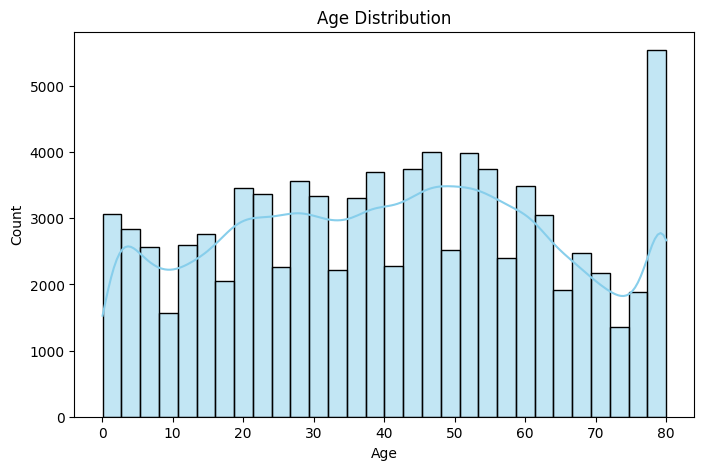

In [599]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


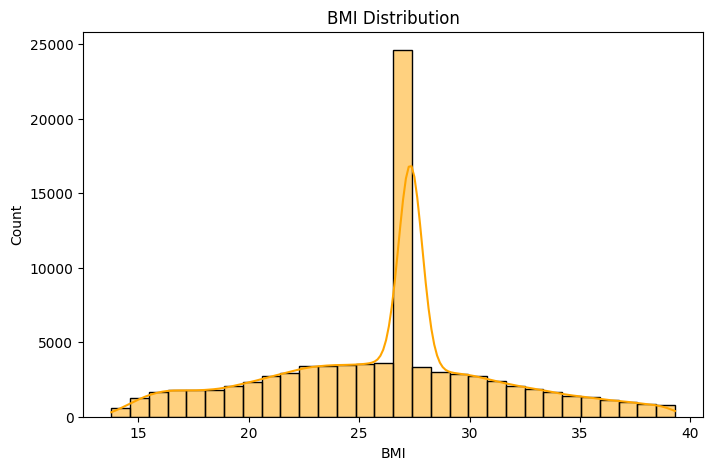

In [600]:
plt.figure(figsize=(8,5))
sns.histplot(df['bmi'], bins=30, kde=True, color='orange')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


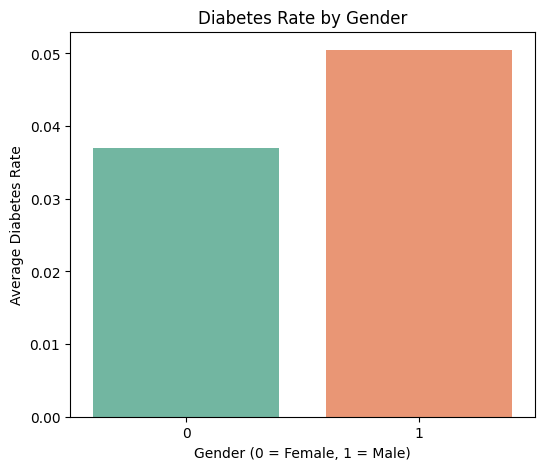

In [601]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.barplot(
    x='gender_Male',
    y='diabetes',
    data=df,
    errorbar=None,      # بدل ci=None
    hue='gender_Male',  # علشان يشتغل مع palette
    palette='Set2',
    legend=False
)
plt.title('Diabetes Rate by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Average Diabetes Rate')
plt.show()


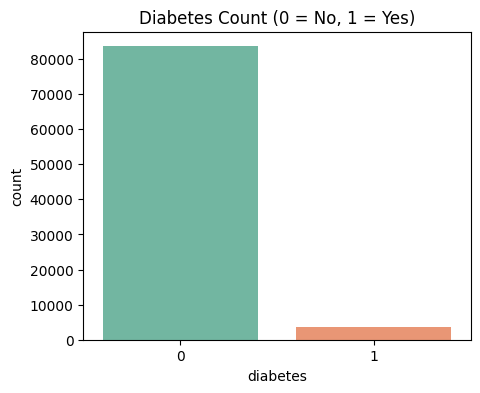

In [602]:
plt.figure(figsize=(5,4))
sns.countplot(x='diabetes', data=df, hue='diabetes', palette='Set2', legend=False)
plt.title('Diabetes Count (0 = No, 1 = Yes)')
plt.show()



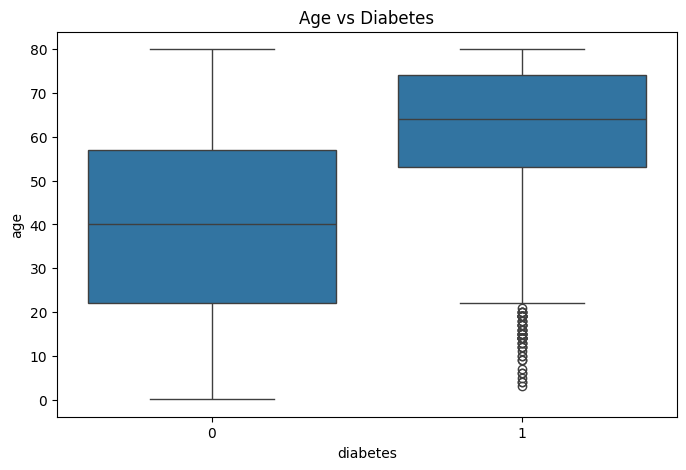

In [603]:
plt.figure(figsize=(8,5))
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()


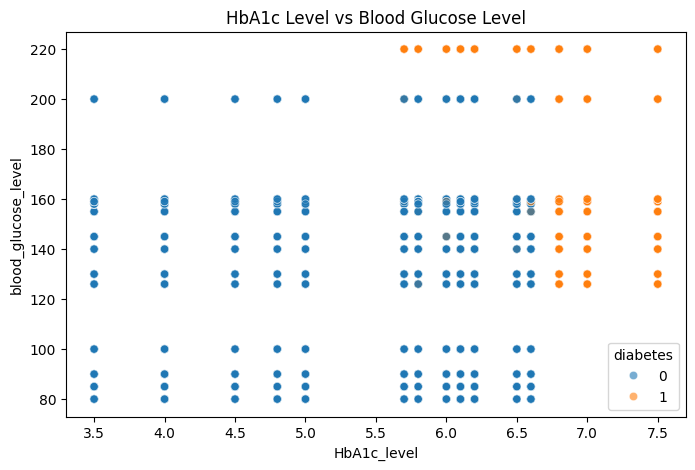

In [604]:
#العلاقة بين HbA1c Level ومستوى الجلوكوز:
plt.figure(figsize=(8,5))
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', hue='diabetes', data=df, alpha=0.6)
plt.title('HbA1c Level vs Blood Glucose Level')
plt.show()


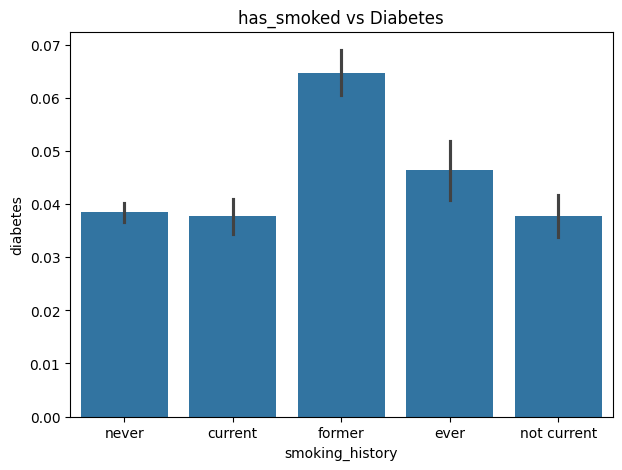

In [605]:
plt.figure(figsize=(7,5))
sns.barplot(x='smoking_history', y='diabetes', data=df)
plt.title('has_smoked vs Diabetes')
plt.show()


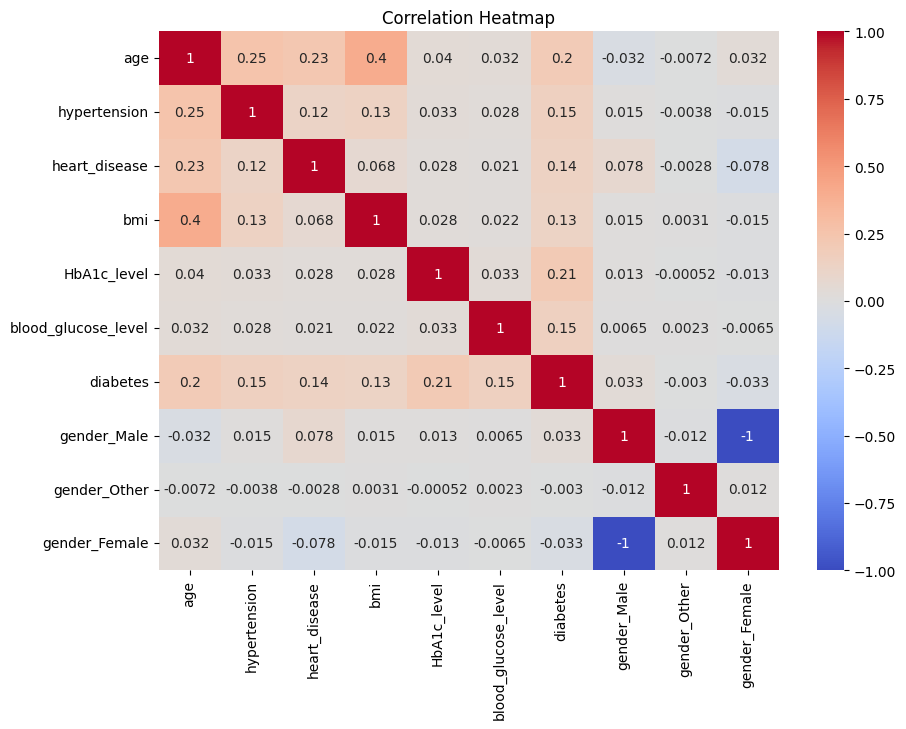

In [606]:
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **DASH BBOARD**

In [607]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

# إنشاء التطبيق
app = Dash(__name__)

# تحديد مدى العمر من البيانات نفسها
min_age = int(df['age'].min())
max_age = int(df['age'].max())

# تصميم الواجهة (Layout)
app.layout = html.Div([
    html.H1("📊 Diabetes Dashboard with Age Filter", style={'textAlign': 'center', 'marginBottom': 30}),

    # 🔹 Slider لاختيار مدى العمر
    html.Div([
        html.Label("Select Age Range:", style={'fontWeight': 'bold'}),
        dcc.RangeSlider(
            id='age-slider',
            min=min_age,
            max=max_age,
            step=1,
            marks={i: str(i) for i in range(min_age, max_age+1, 10)},
            value=[min_age, max_age],
            tooltip={"placement": "bottom", "always_visible": True}
        )
    ], style={'margin': '40px'}),

    # 🔹 اختيار المتغير للـ Box Plot
    html.Div([
        html.Label("Select variable for Box Plot:", style={'fontWeight': 'bold'}),
        dcc.Dropdown(
            id='variable-dropdown',
            options=[
                {'label': 'BMI', 'value': 'bmi'},
                {'label': 'HbA1c Level', 'value': 'HbA1c_level'},
                {'label': 'Blood Glucose Level', 'value': 'blood_glucose_level'}
            ],
            value='bmi',
            clearable=False,
            style={'width': '50%', 'margin': 'auto'}
        ),
    ], style={'textAlign': 'center', 'marginBottom': 40}),

    # Box Plot
    dcc.Graph(id='box-plot', style={'height': '500px'}),

    html.Hr(),

    # 🔹 اختيار حالة التدخين للـ Histogram
    html.Div([
        html.Label("Select Smoking History:", style={'fontWeight': 'bold'}),
        dcc.Dropdown(
            id='smoke',
            options=[{'label': s, 'value': s} for s in df['smoking_history'].unique()],
            value=df['smoking_history'].unique()[0],
            clearable=False,
            style={'width': '50%', 'margin': 'auto'}
        ),
    ], style={'textAlign': 'center', 'marginBottom': 40}),

    # Histogram
    dcc.Graph(id='bar-chart', style={'height': '500px'})
])


In [608]:
# 🔹 Callback 1 → Box Plot
@app.callback(
    Output('box-plot', 'figure'),
    [Input('variable-dropdown', 'value'),
     Input('age-slider', 'value')]
)
def update_box_plot(selected_var, age_range):
    filtered_df = df[(df['age'] >= age_range[0]) & (df['age'] <= age_range[1])]
    fig = px.box(
        filtered_df,
        x='diabetes',
        y=selected_var,
        color='diabetes',
        title=f"Distribution of {selected_var.capitalize()} by Diabetes Status (Age {age_range[0]}–{age_range[1]})",
        labels={'diabetes': 'Diabetes', selected_var: selected_var.capitalize()},
        template='plotly_white'
    )
    fig.update_layout(title_x=0.5)
    return fig


# 🔹 Callback 2 → Histogram
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('smoke', 'value'),
     Input('age-slider', 'value')]
)
def update_chart(smoke_value, age_range):
    filtered = df[(df['smoking_history'] == smoke_value) &
                  (df['age'] >= age_range[0]) &
                  (df['age'] <= age_range[1])]

    fig = px.histogram(
        filtered,
        x='age',
        color='diabetes',
        barmode='group',
        title=f"Diabetes by Age ({smoke_value}) - Age {age_range[0]}–{age_range[1]}",
        labels={'age': 'Age', 'diabetes': 'Diabetes Status'},
        template='plotly_white'
    )
    fig.update_layout(title_x=0.5)
    return fig

if __name__ == '__main__':
    app.run(debug=True, port=8052)


OSError: Address 'http://127.0.0.1:8052' already in use.
    Try passing a different port to run.